# TP : Arbres de décision et fôrets aléatoires


## Résumé

Un arbre de décision est un modèle de classification hiérarchique : à chaque noeud de l'arbre
est associé un test sur une des dimensions $x_i$ de la forme $x_i \{\leq,~ >,~ = \} s$ ($s$ une valeur réelle) qui indique le noeud fils qui doit être sélectionné (par exemple pour un arbre binaire, le fils gauche quand le test est vrai, le fils droit sinon). A chaque feuille de l'arbre est associée une étiquette. Ainsi, la classification d'un exemple consiste en une succession de tests sur les valeurs des dimensions de l'exemple, selon un chemin dans l'arbre de la racine à une des feuilles. La feuille atteinte donne la classe prédite.

L'apprentissage de l'arbre s'effectue de manière récursive top-down : à chaque noeud, l'algorithme choisit le split vertical (seuillage
d'une variable) qui optimise une mesure d'homogénéité sur la partition obtenue (usuellement l'[entropie de shanon](http://fr.wikipedia.org/wiki/Entropie_de_Shannon#D.C3.A9finition_formelle) ou l'[index de Gini](http://fr.wikipedia.org/wiki/Coefficient_de_Gini) : l'entropie d'une partition est d'autant plus petite qu'une classe prédomine dans chaque sous-
ensemble de la partition, elle est nulle lorsque la séparation est parfaite).

Bien que l'algorithme pourrait continuer récursivement jusqu'à n'obtenir que des feuilles contenant un ensemble pur d'exemples (d'une seule classe), on utilise souvent des critères d'arrêts (pourquoi ? - nous y reviendrons lors de ce TP). Les plus communs sont les suivants :

+ le nombre d'exemples minimum que doit contenir un noeud

+ la profondeur maximale de l'arbre

+ la différence de gain de la mesure d'homogénéité entre le noeud père et les noeuds fils





## Prise en main sklearn, données artificielles
scikit-learn est un des modules de machine learning les plus populaires (installation : pip install scikit-learn --user).
Il contient les algos que nous avons déjà vu (knn, noyaux, perceptron, regression), et bien d'autres outils et algorithmes.

In [48]:
import numpy as np # module pour les outils mathématiques
import matplotlib.pyplot as plt # module pour les outils graphiques
import tools # module fourni en TP1
from sklearn import tree, linear_model # module pour les arbres
from sklearn import ensemble # module pour les forets
from sklearn import cross_validation as cv
from IPython.display import Image
import pydot

#que pour jupyter  !!
%matplotlib inline

Tous les modeles d'apprentissage sous scikit fonctionnent de la manière suivante :

+ création du classifieur (ici  **cls=Classifier()**)

+ réglage des paramètres (par exemple la profondeur maximale, le nombre d'exemples par noeud)

+ apprentissage du classifieur par l'intermédiaire de la fonction **cls.fit(data,labels)** 

+ prediction pour de nouveaux exemples : fonction **cls.predict(data)**

+ score du classifieur (précision, pourcentage d'exemples bien classés) : fonction **cls.score(data,labels)**

Pour un arbre de décision, la classe est **tree.DecisionTreeClassfier()**.
Dans le cas des arbres de décisions, nous avons aussi la possibilité d'obtenir l'importance des variables, un score qui est d'autant plus grand que la variable est "utile" pour la classification.

precision :  0.0
precision (score) : 1.0
|---------X1<=0.04
|         |---------(-1.0: 500, 1.0: 0)
|---------X1>0.04
          |---------(-1.0: 0, 1.0: 500)



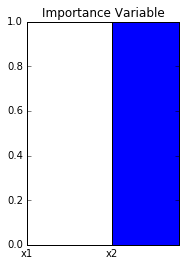

In [2]:
#Initialisation
data,y=tools.gen_arti()
mytree=tree.DecisionTreeClassifier() #creation d'un arbre de decision
mytree.max_depth=8 #profondeur maximale de 5
mytree.min_samples_split=1 #nombre minimal d'exemples dans une feuille
#Apprentissage
mytree.fit(data,y)

#prediction
pred=mytree.predict(data)
print ("precision : ", (1.*pred!=y).sum()/len(y))

#ou directement pour la precision : 
print ("precision (score) : "  + str(mytree.score(data,y)))

#Importance des variables :
plt.subplot(1,2,2)
plt.bar([1,2],mytree.feature_importances_)
plt.title("Importance Variable")
plt.xticks([1,2],["x1","x2"])


    
###### Si graphviz n'est pas installe, la fonction suivante permet d'afficher un arbre
def affiche_arbre(tree):
    long = 10
    sep1="|"+"-"*(long-1)
    sepl="|"+" "*(long-1)
    sepr=" "*long
    def aux(node,sep):
        if tree.tree_.children_left[node]<0:
            ls ="(%s)" % (", ".join( "%s: %d" %(tree.classes_[i],int(x)) for i,x
 in enumerate(tree.tree_.value[node].flat)))
            return sep+sep1+"%s\n" % (ls,)
        return (sep+sep1+"X%d<=%0.2f\n"+"%s"+sep+sep1+"X%d>%0.2f\n"+"%s" )% \
                    (tree.tree_.feature[node],tree.tree_.threshold[node],aux(tree.tree_.children_left[node],sep+sepl),
                    tree.tree_.feature[node],tree.tree_.threshold[node],aux(tree.tree_.children_right[node],sep+sepr))
    return aux(0,"")
print(affiche_arbre(mytree))

In [26]:
def TREE(data_type, nbex, epsilon, depth, nb_min):
    eps = epsilon
    datax,y = tools.gen_arti(data_type,nbex,epsilon = eps)
    # Affichage des données
    tools.plot_data(datax,y)
    plt.show()
    mytree=tree.DecisionTreeClassifier() #creation d'un arbre de decision
    mytree.max_depth=depth #profondeur maximale de 5
    mytree.min_samples_split=nb_min #nombre minimal d'exemples dans une feuille
    #Apprentissage
    mytree.fit(data,y)

    #prediction
    pred=mytree.predict(data)
    print ("precision : ", (1.*pred!=y).sum()/len(y))

    #ou directement pour la precision : 
    print ("precision (score) : "  + str(mytree.score(data,y)))

    #Importance des variables :
    plt.subplot(1,2,2)
    plt.bar([1,2],mytree.feature_importances_)
    plt.title("Importance Variable")
    plt.xticks([1,2],["x1","x2"])

    print(affiche_arbre(mytree))

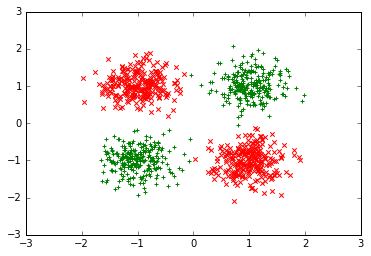

precision :  0.343
precision (score) : 0.657
|---------X0<=-1.10
|         |---------X0<=-1.13
|         |         |---------X1<=-1.03
|         |         |         |---------X0<=-1.73
|         |         |         |         |---------(-1.0: 3, 1.0: 0)
|         |         |         |---------X0>-1.73
|         |         |                   |---------X1<=-1.48
|         |         |                   |         |---------X1<=-1.65
|         |         |                   |         |         |---------(-1.0: 0, 1.0: 2)
|         |         |                   |         |---------X1>-1.65
|         |         |                   |                   |---------X1<=-1.58
|         |         |                   |                   |         |---------X1<=-1.59
|         |         |                   |                   |         |         |---------(-1.0: 4, 1.0: 1)
|         |         |                   |                   |         |---------X1>-1.59
|         |         |                   |   

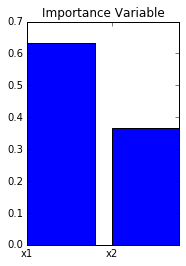

In [35]:
TREE(data_type=1, nbex=1000, epsilon=0.1, depth=8, nb_min=1)

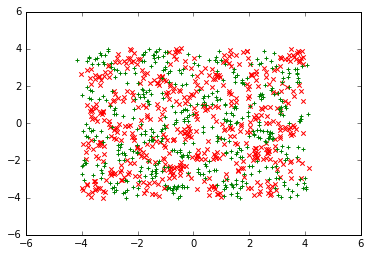

precision :  0.338
precision (score) : 0.662
|---------X0<=-1.37
|         |---------X0<=-1.40
|         |         |---------X1<=-1.09
|         |         |         |---------X1<=-1.16
|         |         |         |         |---------X1<=-1.53
|         |         |         |         |         |---------(-1.0: 2, 1.0: 0)
|         |         |         |         |---------X1>-1.53
|         |         |         |                   |---------X0<=-1.48
|         |         |         |                   |         |---------X0<=-1.62
|         |         |         |                   |         |         |---------X0<=-1.83
|         |         |         |                   |         |         |         |---------(-1.0: 1, 1.0: 0)
|         |         |         |                   |         |         |---------X0>-1.83
|         |         |         |                   |         |                   |---------(-1.0: 0, 1.0: 3)
|         |         |         |                   |         |---------X0>

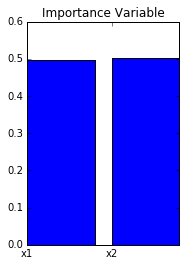

In [37]:
TREE(data_type=2, nbex=1000, epsilon=0.1, depth=8, nb_min=1)

## Données générées artificiellement


Nous constatons que plus l'arbre est profond, plus la précision est bonne. Cependant il faut éviter le sur-apprentissage. Une validation croisé pour trouver la profondeur et le nombre minimum d'exemple par noeud semble nécessaire.

L'erreur indiquée n'est pas donc pertinente sans données de test.

## Validation croisée : sélection de modèle

Il est rare de disposer en pratique d'un ensemble de test (on préfère inclure le plus grand
nombre de données dans l'ensemble d'apprentissage). Pour sélectionner un modèle tout en considérant le plus grand nombre d'exemples possible pour l'apprentissage, on utilise généralement
une procédure dite de sélection par validation croisée. Pour chaque paramètrisation du problème,
une estimation de l'erreur empirique du classifieur appris est faîte selon la procédure suivante :

+ l'ensemble d'apprentissage $E_{app}$ est partitioné en $n$ ensembles d'apprentissage $\{E_i\}$

+ Pour $i=1..n$

  + l'arbre est appris sur $E_{app}$\ $E_i$

  + l'erreur en test $err(E_i)$ est évaluée sur $E_i$ (qui n'a pas servi à l'apprentissage à cette itération)

+ l'erreur moyenne $err=\frac{1}{n}\sum_{i=1}^n err(E_i)$ est calculée, le modèle sélectionné est celui qui minimise cette erreur


Ci-dessous quelques fonctions utiles pour la sélection de modèle :

In [38]:
datax,y = tools.gen_arti(data_type=2,nbex=1000,epsilon=1)
#permet de partager un ensemble en deux ensembles d'apprentissage et de test 
mytree=tree.DecisionTreeClassifier()
mytree.max_depth=8
mytree.min_samples_split=1
# Split 30% test
data_train,data_test,y_train,y_test=cv.train_test_split(data,y,test_size=0.3)
mytree.fit(data_train,y_train)
print ("precision en test (split 30 %) : ", mytree.score(data_test,y_test))

#permet d'executer une n-validation croisée et d'obtenir le score pour chaque tentative
print ("precision en test (10-fold validation) : ",cv.cross_val_score(mytree,data,y,cv=10).mean())


precision en test (split 30 %) :  0.486666666667
precision en test (10-fold validation) :  0.52898289829


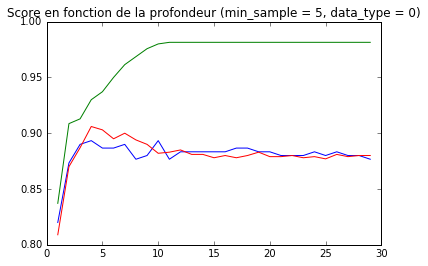

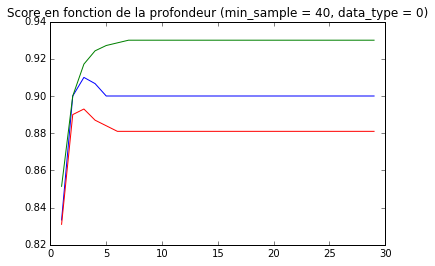

In [41]:
# Score en fonction de la profondeur
l = range(1,30)
score_test = []
score_train = []
score_kfold = []
data,y = tools.gen_arti(data_type=0,nbex=1000,epsilon=1)
data_train,data_test,y_train,y_test = cv.train_test_split(data,y,test_size=0.3)
mytree.fit(data_train,y_train)
for i in l:
    mytree=tree.DecisionTreeClassifier() #creation d'un arbre de decision
    mytree.max_depth=i
    mytree.min_samples_split=5 
    mytree.fit(data_train,y_train)
    score_train.append(mytree.score(data_train,y_train))
    score_test.append(mytree.score(data_test,y_test))
    score_kfold.append(cv.cross_val_score(mytree,data,y,cv=10).mean())

plt.plot(l, score_test) # en vert   
plt.plot(l,score_train)
plt.plot(l, score_kfold)

plt.title("Score en fonction de la profondeur (min_sample = 5, data_type = 0)")
plt.show()


# Score en fonction de la profondeur
l = range(1,30)
score_test = []
score_train = []
score_kfold = []
data,y = tools.gen_arti(data_type=0,nbex=1000,epsilon=1)
data_train,data_test,y_train,y_test = cv.train_test_split(data,y,test_size=0.3)
mytree.fit(data_train,y_train)
for i in l:
    mytree=tree.DecisionTreeClassifier() #creation d'un arbre de decision
    mytree.max_depth=i
    mytree.min_samples_split= 40 
    mytree.fit(data_train,y_train)
    score_train.append(mytree.score(data_train,y_train))
    score_test.append(mytree.score(data_test,y_test))
    score_kfold.append(cv.cross_val_score(mytree,data,y,cv=10).mean())

plt.plot(l, score_test)   
plt.plot(l,score_train)
plt.plot(l, score_kfold)

plt.title("Score en fonction de la profondeur (min_sample = 40, data_type = 0)")
plt.show()

Si le nombre d'exemples par noeud est trop faible, il y a un fort sur-apprentissage (cf premier graphique). Plus on augmente le nombre d'exemples par noeud, plus le sur-apprentissage diminue (écart entre le score d'apprentissage et le score de test). Lorsqu'il y a peu de sur-apprentissage, les deux courbes atteignent leur valeur asymptotique au bout d'une profondeur de 10.

L'erreur par 10-fold est plus lisse que celle par par validation croisée car c'est une moyenne.


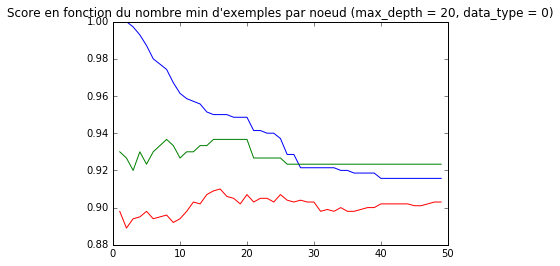

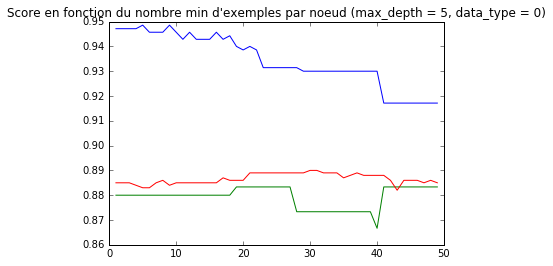

In [42]:
l = range(1,50)
score_test = []
score_train = []
score_kfold = []
data,y = tools.gen_arti(data_type=0,nbex=1000,epsilon=1)
data_train,data_test,y_train,y_test = cv.train_test_split(data,y,test_size=0.3)
for i in l:
    mytree=tree.DecisionTreeClassifier() #creation d'un arbre de decision
    mytree.max_depth=20
    mytree.min_samples_split=i #nombre minimal d'exemples dans une feuille
    mytree.fit(data_train,y_train)
    score_train.append(mytree.score(data_train,y_train))
    score_test.append(mytree.score(data_test,y_test))
    score_kfold.append(cv.cross_val_score(mytree,data,y,cv=10).mean())
plt.plot(l,score_train)
plt.plot(l, score_test)
plt.plot(l, score_kfold)
plt.title("Score en fonction du nombre min d'exemples par noeud (max_depth = 20, data_type = 0)")
plt.show()

l = range(1,50)
score_test = []
score_train = []
score_kfold = []
data,y = tools.gen_arti(data_type=0,nbex=1000,epsilon=1)
data_train,data_test,y_train,y_test = cv.train_test_split(data,y,test_size=0.3)
for i in l:
    mytree=tree.DecisionTreeClassifier() #creation d'un arbre de decision
    mytree.max_depth=5
    mytree.min_samples_split=i #nombre minimal d'exemples dans une feuille
    mytree.fit(data_train,y_train)
    score_train.append(mytree.score(data_train,y_train))
    score_test.append(mytree.score(data_test,y_test))
    score_kfold.append(cv.cross_val_score(mytree,data,y,cv=10).mean())
plt.plot(l,score_train)
plt.plot(l, score_test)
plt.plot(l, score_kfold)
plt.title("Score en fonction du nombre min d'exemples par noeud (max_depth = 5, data_type = 0)")
plt.show()

On remarque que plus on augmente le nombre minimal d'exemple par noeud, plus le score de test diminue et le score d'entraînement augmente. Ainsi le sur-apprentissage diminue logiquement mais un sous apprentissage peut apparaitre, de plus on remarque bien ici l'importance de la profondeur.


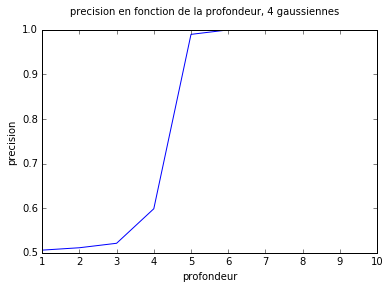

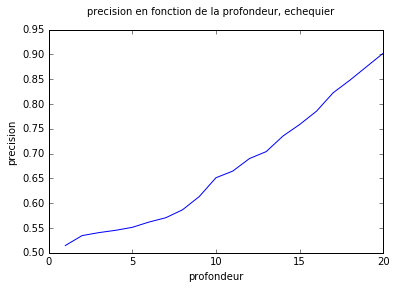

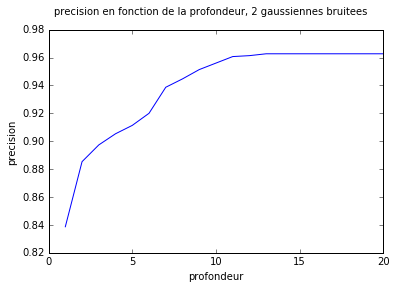

In [43]:
vec2=np.arange(1,11,1) 
precision_score=[]

data,y = tools.gen_arti(data_type=1,nbex=1500)
mytree = tree.DecisionTreeClassifier() #creation d'un arbre de decision
for i in vec2:
    mytree.max_depth=i #profondeur maximale de 5
    mytree.min_samples_split=10 #nombre minimal d'exemples dans une feuille
    mytree.fit(data,y)
    pred=mytree.predict(data)
    precision_score.append(mytree.score(data,y))

plt.figure().suptitle('precision en fonction de la profondeur, 4 gaussiennes')
plt.plot(vec2,precision_score)
plt.ylabel('precision')
plt.xlabel('profondeur')
plt.show()

vec2=np.arange(1,21,1) 
#Graphique de la précision en fonction de la profondeur
precision_score=[]

data,y = tools.gen_arti(data_type=2,nbex=1500)
mytree = tree.DecisionTreeClassifier() #creation d'un arbre de decision
for i in vec2:
    mytree.max_depth=i #profondeur maximale de 5
    mytree.min_samples_split=10 #nombre minimal d'exemples dans une feuille
    mytree.fit(data,y)
    pred=mytree.predict(data)
    precision_score.append(mytree.score(data,y))

plt.figure().suptitle('precision en fonction de la profondeur, echequier')
plt.plot(vec2,precision_score)
plt.ylabel('precision')
plt.xlabel('profondeur')
plt.show()

vec2=np.arange(1,21,1) 
#Graphique de la précision en fonction de la profondeur
precision_score=[]

data,y = tools.gen_arti(data_type=0,nbex=1500,epsilon=1)
mytree = tree.DecisionTreeClassifier() #creation d'un arbre de decision
for i in vec2:
    mytree.max_depth=i #profondeur maximale de 5
    mytree.min_samples_split=10 #nombre minimal d'exemples dans une feuille
    mytree.fit(data,y)
    pred=mytree.predict(data)
    precision_score.append(mytree.score(data,y))

plt.figure().suptitle('precision en fonction de la profondeur, 2 gaussiennes bruitees')
plt.plot(vec2,precision_score)
plt.ylabel('precision')
plt.xlabel('profondeur')
plt.show()

La précision augmente toujours avec la profondeur de l'arbre. On constate par contre que cette evolution n'est pas identique selon le jeu de données:
Pour les 4 gaussiennes, une valeur seuil de la profondeur pour avoir un score de 1 apparait.
Pour l'échiquier, l'arbre a besoin d'une profondeur plus importante pour séparer et la croissance de la precision selon la profondeur est quasi linéaire. 

*<font style="BACKGROUND-COLOR: lightgray" color='red'>Manipuler sur les différents types de génération artificielle ces fonctions afin de trouver les meilleurs paramètres selon le problème. Tracer l'erreur d'apprentissage et l'erreur de test en fonction des paramètres étudiés. Que se passe-t-il pour des profondeurs trop élevées des arbres ?</font>*

## Classification données USPS

Tester sur les données USPS (en sélectionnant quelques sous-classes). Observer l'importance des variables. Afficher la matrice 2D de la variable importance de chaque pixel de l'image (avec **plt.imshow(matrix)**). Les résultats semble-t-ils cohérents ? 
Utiliser l'algorithme du perceptron fourni par sklearn (**linear_model.Perceptron**) ou le votre et comparer les résultats obtenus pour les poids.

Sur quelques exemples, comparer les performances des arbres et du Perceptron en utilisant la validation croisée pour calibrer au mieux vos modèles. 

Expérimenter également les fôrets aléatoires : c'est une méthode de baging très utilisée, qui consiste à considérer un ensemble d'arbres appris chacun sur un échantillonage aléatoire de la base d'exemples; la classification se fait par vote majoritaire (**enemble.RandomForestClassifier()**).

6


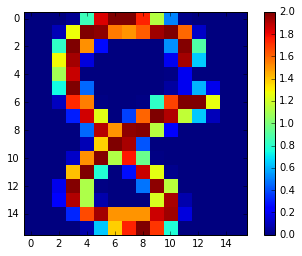

In [45]:
def  load_usps(filename):
    with open(filename ,"r") as f:
        f.readline()
        data = [[float(x) for x in l.split()] for l in f if len(l.split())>2]
    tmp = np.array(data)
    return tmp[:,1:],tmp[:,0].astype(int)
datax,y = load_usps("usps.txt")
plt.imshow(datax[100].reshape((16,16)),interpolation="nearest")
plt.colorbar()
print(y[0])
data_train,data_test,y_train,y_test=cv.train_test_split(datax,y,test_size=0.3)

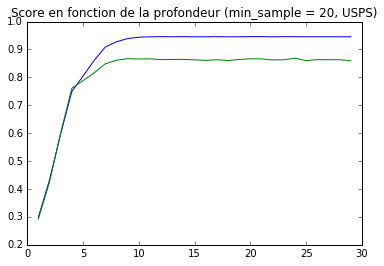

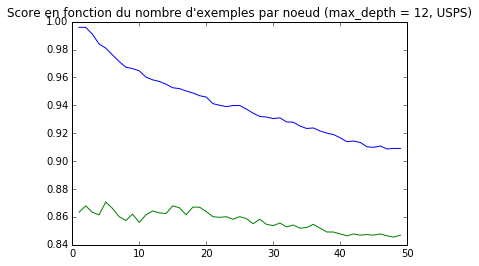

In [46]:
#traçons la précision (score) en fonction de la profondeur 
l = range(1,30)
score_test = []
score_train = []
#score_kfold = []

for i in l:
    mytree=tree.DecisionTreeClassifier() #creation d'un arbre de decision
    mytree.max_depth=i
    mytree.min_samples_split=20 #nombre minimal d'exemples dans une feuille 20 !!
    mytree.fit(data_train,y_train)
    score_train.append(mytree.score(data_train,y_train))
    score_test.append(mytree.score(data_test,y_test))
    #score_kfold.append(cv.cross_val_score(mytree,datax,y,cv=10).mean())
    
plt.plot(l,score_train)
plt.plot(l, score_test)
#plt.plot(l, score_kfold)
plt.title("Score en fonction de la profondeur (min_sample = 20, USPS)")
plt.show()


l = range(1,50)
score_test = []
score_train = []
#score_kfold = []
for i in l:
    mytree=tree.DecisionTreeClassifier() #creation d'un arbre de decision
    mytree.max_depth=12
    mytree.min_samples_split=i #nombre minimal d'exemples dans une feuille
    mytree.fit(data_train,y_train)
    score_train.append(mytree.score(data_train,y_train))
    score_test.append(mytree.score(data_test,y_test))
    #score_kfold.append(cv.cross_val_score(mytree,data,y,cv=10).mean())
    
plt.plot(l,score_train)
plt.plot(l, score_test)
#plt.plot(l, score_kfold)
plt.title("Score en fonction du nombre d'exemples par noeud (max_depth = 12, USPS)")
plt.show()

Pour calibrer le modèle, nous obtenons pour limiter le sur-apprentissage et obtenir le meilleur score :
- Profondeur : 12
- Nombre d'exemples par noeud : 20


In [49]:
model = linear_model.Perceptron()
model.fit(data_train, y_train)
print ('-- Perceptron --')
print ('score train : ', model.score(data_train, y_train))
print ('score test : ', model.score(data_test, y_test))

mytree=tree.DecisionTreeClassifier() #creation d'un arbre de decision
mytree.max_depth=12
mytree.min_samples_split=20 
mytree.fit(data_train,y_train)
print ('-- Arbre --')
print ("score train : ", mytree.score(data_train,y_train))
print ('score test : ', mytree.score(data_test, y_test))

-- Perceptron --
score train :  0.951401136586
score test :  0.93647166362
-- Arbre --
score train :  0.946110131295
score test :  0.862431444241


Remarque : Le score obtenu par le perceptron linéaire est meilleur que celui pour les abres cela est du au sur-apprentissage qui est plus faible pour le perceptron que pour les arbres.


score test Perceptron :  0.987659963437
score test Arbres :  0.972120658135


/Users/danconstantini/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


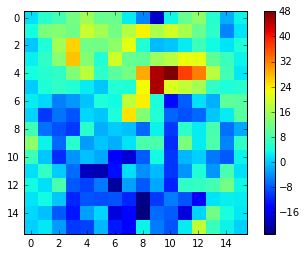

In [50]:
## Une classe contre toutes
datax,y = load_usps("usps.txt")
perc = linear_model.Perceptron()
mytree=tree.DecisionTreeClassifier() #creation d'un arbre de decision
mytree.max_depth=12
mytree.min_samples_split=20 

usps_6 = datax[y==6]
usps_not6 = datax[y!=6]
data_usps=np.vstack((usps_6,usps_not6))

label_6= -1*np.ones((len(usps_6),1))
label_not6=np.ones((len(usps_not6),1))
label=np.vstack((label_6,label_not6))

data_train,data_test,label_train,label_test=cv.train_test_split(data_usps,label,test_size=0.3)

mytree.fit(data_train,label_train)
perc.fit(data_train,label_train)
print ('score test Perceptron : ', perc.score(data_test,label_test))
print ('score test Arbres : ', mytree.score(data_test,label_test))
plt.imshow(perc.coef_.reshape((16,16)),interpolation="nearest")
plt.colorbar()

In [51]:
## Random Forest
datax,y = load_usps("usps.txt")
data_train,data_test,y_train,y_test=cv.train_test_split(datax,y,test_size=0.3)

model = linear_model.Perceptron()
model.fit(data_train, y_train)
print ('-- Perceptron --')
print ('score train : ', model.score(data_train, y_train))
print ('score test : ', model.score(data_test, y_test))

mytree=tree.DecisionTreeClassifier() #creation d'un arbre de decision
mytree.max_depth=12
mytree.min_samples_split=20 
mytree.fit(data_train,y_train)
print ('-- Arbre --')
print ("score train : ", mytree.score(data_train,y_train))
print ('score test : ', mytree.score(data_test, y_test))

rf=ensemble.RandomForestClassifier() #creation random forest
rf.fit(data_train,y_train)
print ('-- Random Forest --')
print ("score train : ", rf.score(data_train,y_train))
print ('score test : ', rf.score(data_test, y_test))

-- Perceptron --
score train :  0.945130315501
score test :  0.924588665448
-- Arbre --
score train :  0.929649225946
score test :  0.829067641682
-- Random Forest --
score train :  0.998432294729
score test :  0.93647166362


Random Forest consiste à considérer un ensemble d'arbres appris chacun sur un échantillonage aléatoire de la base d'exemples. La classification se fait par vote majoritaire. L'algorithme des forêts d'arbres décisionnels effectue un apprentissage sur de multiples arbres de décision entraînés sur des sous-ensembles de données légèrement différents.

On obtient donc logiquement un meilleur score que pour un arbre classique et on peut constater que l'on obtient également un meilleure score que pour le perceptron linéaire.

## Classification sur la base movielens 

La base movielens est une base de données issue d'imdb, qui contient des informations sur des films (le genre, l'année de production, des tags) et des notes attribuées par les utilisateurs. Elle est utilisée généralement pour la recommendation de films. Nous allons l'utiliser dans le cadre de la classification, afin de prédire si un film est bon ou mauvais, dans deux contextes :

+ en prenant en compte uniquement l'information sur le film et le score moyen du film

+ en prenant en compte l'information de l'utilisateur qui score le film

Télécharger l'[archive suivante](http://www-connex.lip6.fr/~baskiotisn/ARF15/imdb_extrait.pkl)

Le bloc de code suivant est utilisé pour  charger et prétraiter les données.

In [ ]:
import cPickle
[data,id2titles, fields]=cPickle.load(file("imdb_extrait.pkl"))
datax = data[:,:32]
datay= np.array([1 if x[33]>6.5 else -1 for x in data]) # seuil de bon film a 6.5
